# Homework 2  
## Alexander Morakhovski | Julian Lechuga



# Pricing Diamonds


The dataset contains the following features.
- price : price of the dimaond in dollars.

- carat : weight of the diamond

- cut : quality of the cut

- color : color of the diamond, J (worst) to D (best)

- clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- x : length (mm) 

- y :  width (mm) 

- z : depth (mm) 

- depth : 2 * z / (x + y)

- table :  width of top of diamond relative to widest point



## Your job

- Try to understand the data, visualize it. You may use unsupervised learning methods at this stage.
- The main aim is then to predict, using supervised learning methods, the price of diamonds based on their different quality features.

## We want to see the following things

- Prediction results and mean squared error obtained on the test set for the methods you considered.
- A discussion about the impact of the hyperparameters of the methods on your predictions.
- A clear comparison between your solutions (a table, and/or plots comparing the results obtained with different methods).
- A discussion about the difficulties encountered if applicable.
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did efficient calibration of the methods and serious comparisons between different methods
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Hand in your assignment  before 11/11/20 23h55 :

- via Moodle for all Université de Paris students
- via email for Paris 1 students, subject [Machine Learning DM2], aurelie.fischer@univ-paris-diderot.fr


## Example of methods

Unsupervised learning methods and visualization :
- PCA
- k-means
- mixture models
- spectral clustering
...

Supervised learning methods :
- discriminant analysis
- logistic regression
- SVM
- regression trees
- bagging
- random forests
- boosting
- ...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
import matplotlib.pyplot as plt
%matplotlib inline
# Permet a une cellule d'avoir plus d'un display en sortie
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.drop("Unnamed: 0",axis =1, inplace=True)

In [3]:
diamond_df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
diamond_df.shape

(53940, 10)

In [5]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

We can see with info() that we do not have any NaN values in the dataset. This makes it perfect to work with.

In [6]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diamond_df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [8]:
print(diamond_df["cut"].unique())
print(diamond_df["color"].unique())
print(diamond_df["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Here we create the numerical values that we will assign to the possible categories of the cut, color and clarity columns since it is much easier to work with numerical values in regression. The better the quality of the category in the original column the higher the number we assign in the new version of the column (for example J is the worst value of color so it gets a 1 and D is the best so it gets a 7). 

In [9]:
clarity_class = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
cut_class = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_class = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [10]:
# Creation of column volume from columns x,y,z
diamond_df['volume'] = diamond_df['x']*diamond_df['y']*diamond_df['z']
diamond_df.drop(['x','y','z'],axis=1,inplace=True)
diamond_df = diamond_df[diamond_df['volume']<1000] 

We decide to create a new column called Volume that is based on the columns length, width and depth (it is the product of the three values). We believe that this column will give us more or less the same information whilst reducing the number of dimensions and improving the run time of our models. 

In [11]:
diamond_df['cut'] = diamond_df['cut'].map(cut_class)
diamond_df['clarity'] = diamond_df['clarity'].map(clarity_class)
diamond_df['color'] = diamond_df['color'].map(color_class)

Here we map our original categorical values of cut, clarity and color to the numerical values we created just above.

In [12]:
diamond_df.head()

carat  cut  color  clarity  depth  table  price     volume
0   0.23    5      6        2   61.5   55.0    326  38.202030
1   0.21    4      6        3   59.8   61.0    326  34.505856
2   0.23    2      6        5   56.9   65.0    327  38.076885
3   0.29    4      2        4   62.4   58.0    334  46.724580
4   0.31    2      1        2   63.3   58.0    335  51.917250

All of these data transformations are just our preparations for performing analysis. We will be  using unsupervised and supervised learning methods. We will be comparing the variables between themselves and obtaining insight into the relationship between them. We will then use regression methods in order to try to predict the price of diamonds with regards to the parameters mentioned above, and then compare them to find the best suited model.

# Data Visualization

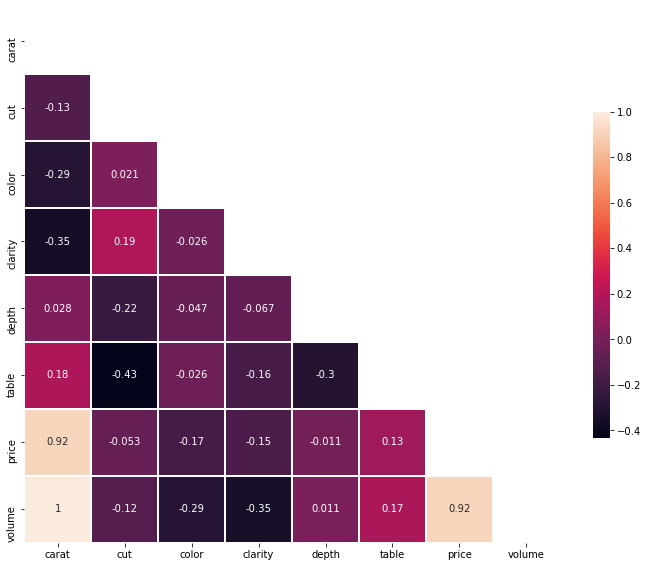

In [13]:
# Correlation between variables but with a mask for upper triangle because it is a mirro image of the 
# lower triangle

corr = diamond_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 0:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, vmax=1, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

As we can see on the correlation heatmap, Volume has a perfect positive correlation score to Carat which makes sense because size and weight are related, especially since it is the same material (diamond). Carat and Volume are both very strongly positively related to Price which also makes sense since the bigger a diamond is the more it is worth most likely. What is interesting is that better clarity or color corresponds to slightly less value of the diamond. 

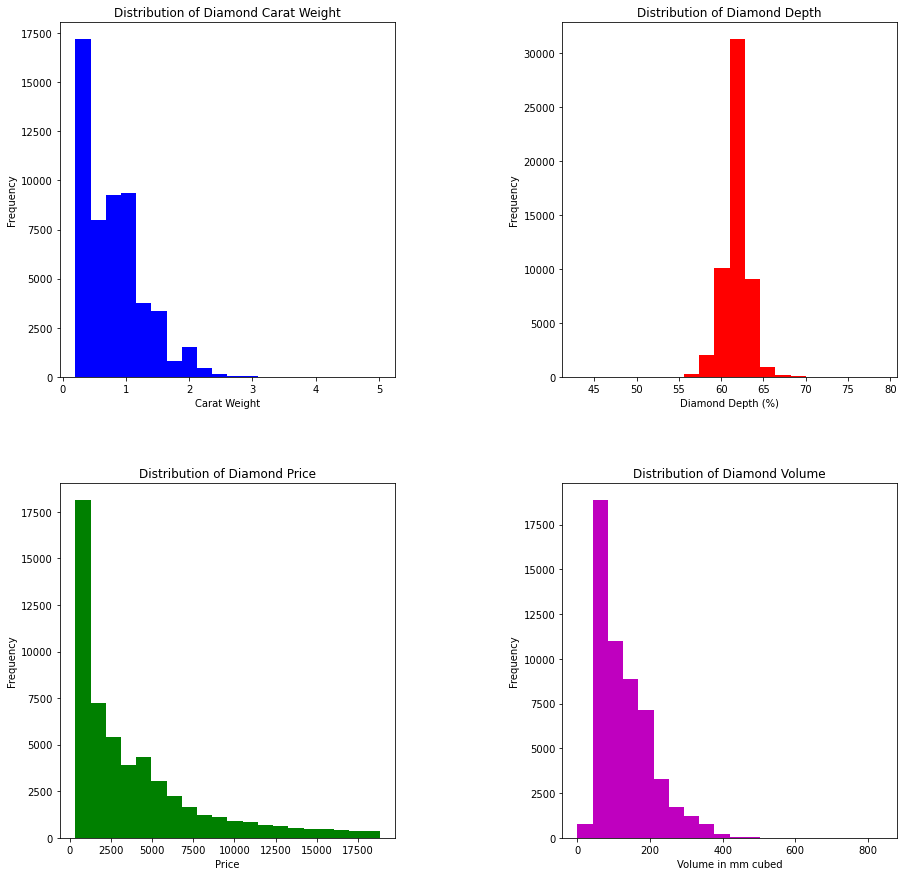

In [14]:
plt.figure(figsize=[15,15])
plt.subplots_adjust(wspace=.5, hspace=.3)
# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(diamond_df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(diamond_df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(diamond_df['price'],bins=20,color='g')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(diamond_df['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

plt.show()

We can see here that weight, price and volume are all distributed as ~1/x so there are many diamonds of small weight, price and volume and not that many that are of high weight, price or volume. On the other hand depth is distributed as a ~normal distribution around 62%.


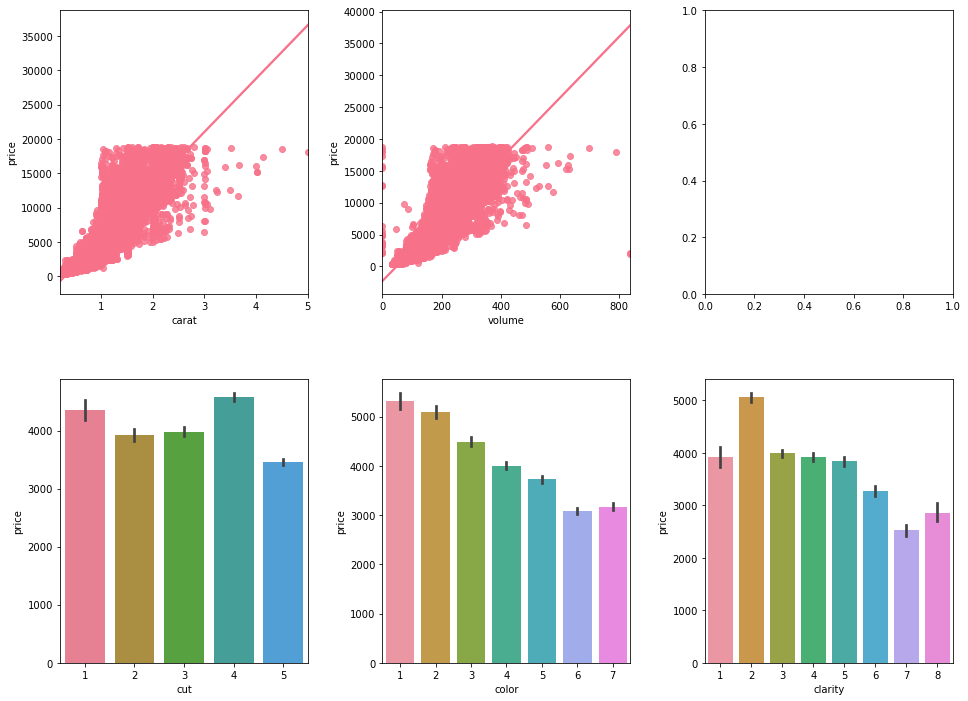

In [15]:
fig, axis = plt.subplots(2, 3,figsize=(16,12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
sns.regplot(x = 'carat', y = 'price', data=diamond_df, ax = axis[0,0])

# This is the reason we need to eliminate outliers!!
sns.regplot(x = 'volume', y = 'price', data=diamond_df, ax = axis[0,1])

# Order the plots from worst to best
#sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=diamond_df, ax = axis[1,0])
#sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=diamond_df, ax = axis[1,1])
#sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=diamond_df, ax = axis[1,2])

# Order the plots from worst to best
sns.barplot(x = 'cut', y = 'price',  data=diamond_df, ax = axis[1,0])
sns.barplot(x = 'color', y = 'price', data=diamond_df, ax = axis[1,1])
sns.barplot(x = 'clarity', y = 'price', data=diamond_df, ax = axis[1,2])

plt.show()

In the first two graphs we see in another way how heavier and larger diamonds generally cost more. In the last three graphs we see that the trends for those variables are not so obvious but as was pointed out before, better color and clarity generally mean slightly lower price, and for the cut the difference is not visible to the human eye.

# Unsupervised learning

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline

In [17]:
diamond_df.head()

carat  cut  color  clarity  depth  table  price     volume
0   0.23    5      6        2   61.5   55.0    326  38.202030
1   0.21    4      6        3   59.8   61.0    326  34.505856
2   0.23    2      6        5   56.9   65.0    327  38.076885
3   0.29    4      2        4   62.4   58.0    334  46.724580
4   0.31    2      1        2   63.3   58.0    335  51.917250

We need to normalize the values of the dataset because the learning methods are very affected by the scale of values>!!

In [19]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X_std = diamond_df.loc[:, features].values
# Separating out the target
y = diamond_df.loc[:,['price']].values
# Standardizing the features
X_std = StandardScaler().fit_transform(X_std)

In [20]:
X_std.shape, y.shape

((53939, 7), (53939, 1))

## PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
n = 7
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents)
PCA_df = pd.concat([principalDf, diamond_df[['price']]], axis = 1)

In [24]:
PCA_df.head()

0         1         2         3         4         5         6  price
0 -1.730837 -0.245986  0.218731 -1.704798 -1.208019  0.164139 -0.009349  326.0
1 -1.132473  2.273445 -0.999194 -0.678459 -0.793943 -0.451753 -0.000368  326.0
2 -0.673607  4.775181 -2.432965  0.678438  0.118200  0.437558 -0.006958  327.0
3 -0.874798  0.032101  0.357155  1.263062 -1.384520 -0.437865  0.006373  334.0
4  0.182721  0.770545  1.883912  1.570499 -2.243268  0.337714  0.040060  335.0

In [25]:
# Computation cumulative sum of explained variances
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

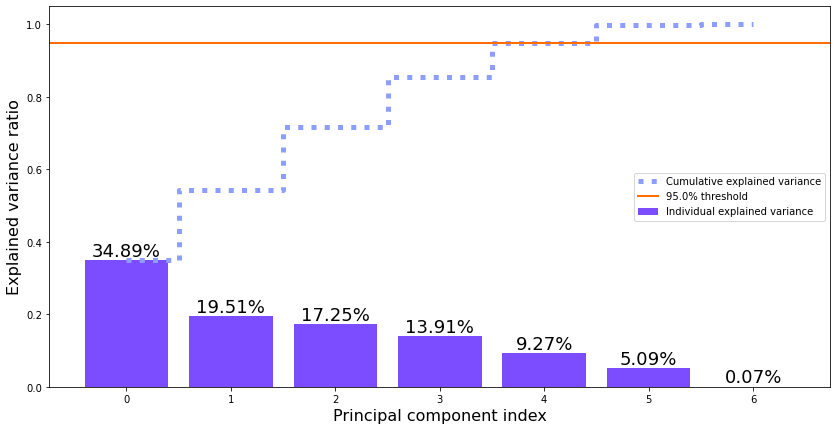

In [26]:
# Plot explained variances
threshold = 0.95
plt.figure(figsize=(14,7))

plt.bar(range(n), var_exp,label='Individual explained variance', color="#7C4DFF")
plt.step(range(n), cum_var_exp,color="#8C9EFF", where='mid',ls=":", lw=5, label='Cumulative explained variance')
plt.axhline(y=threshold, color='#FF6D00', ls='-', lw=2, label="{}% threshold".format(threshold*100))
plt.ylabel('Explained variance ratio', fontsize=16)
plt.xlabel('Principal component index', fontsize=16)

for index, value in enumerate(var_exp):
    plt.text(index, value, "{0:.2f}%".format(value*100), fontsize=18, horizontalalignment='center', verticalalignment='bottom',)
    
plt.legend(loc='best')
plt.show()

Here we see that the first component accounts for more than one third of the total variance which is already quite a bit, and that the first four components account for more than 85% of the variance. This means that the data is not completely linear in any direction, but at the same time if we take the top 4 components we could still acquire a pretty decent model with a 95% of variance explained. 

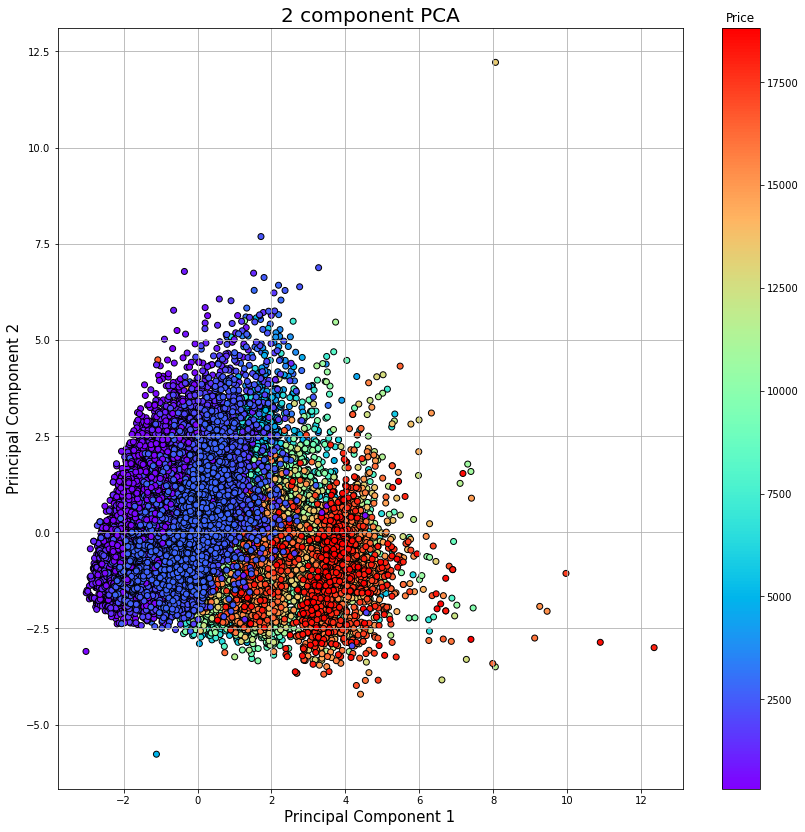

In [27]:
plt.figure(figsize = (14,14))
sc = plt.scatter(x=PCA_df[0], y=PCA_df[1], c=PCA_df["price"], cmap='rainbow', edgecolor='k')

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.colorbar(sc).ax.set_title('Price')
plt.grid()
plt.show()

On this graph we see that higher values of the first principal component generally mean higher price  for the diamond since the data is quite separable on the x-axis (a lot of blue on the left and red on the right). The second component by itself does not help us that much in identifying the price of a diamond because the data is not very separable on the y-axis. Still, for higher values of the second principal component there are slightly more lower priced diamonds and for lower values slightly more higher priced diamonds but this difference is almost negligible.

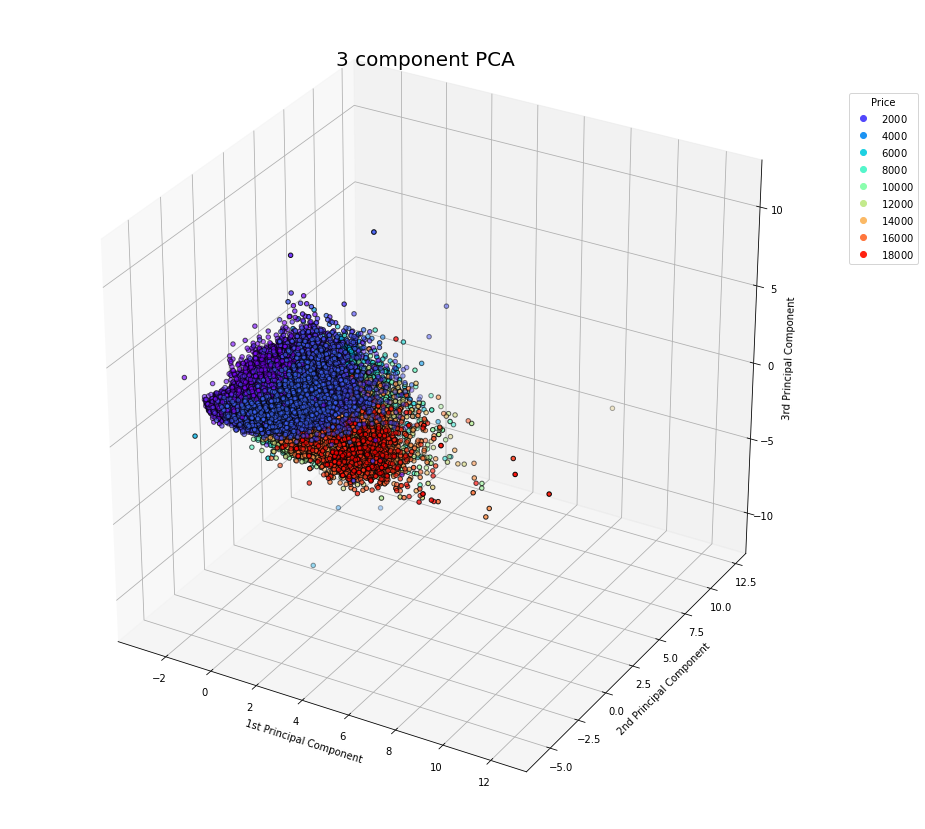

In [28]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(PCA_df[0], PCA_df[1], PCA_df[2], c=PCA_df["price"], cmap='rainbow', edgecolor='k')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, .9), loc=2, title="Price")
plt.title("3 component PCA", fontsize=20)
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
plt.show()

Here we can see the same thing as with 2 component PCA but now we have an extra component which helps increases the explained variance by a smal percentage.Nevertheless, it would be better to consider it in the components than excluding it. 

# Supervised Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [30]:
models_scores = {}

In [31]:
def plot_model_accuracy(expected, predicted, model, model_name):
    fontsize=16
    
    mse = metrics.mean_squared_error(y_test, predicted)
    rms = np.sqrt(mse)
    acc = model.score(X_test, y_test)*100
    textstr = 'MSE = ${0:,.2f}\nRMS = ${1:,.2f}\nAccuracy Score = {2:.2f}%'.format(mse, rms, acc)
    
    models_scores[model_name] = {"rms": rms, "mse": mse, "acc": acc}
        
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', alpha=.5, color="#F53677", ec="k")
    
    plt.figure(figsize = (12,6))
    plt.scatter(expected, predicted, c="#5536F5", edgecolor='k') 
    plt.title(model_name, fontsize=fontsize)
    plt.xlabel('True price', fontsize=fontsize)
    plt.ylabel('Predicted price', fontsize=fontsize)
    xpoints = ypoints = plt.xlim()
    y_max = max(plt.ylim())
    plt.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)
    plt.text(0, y_max-1e3, textstr, fontsize=14, verticalalignment='top', bbox=props)
    plt.show()

In [32]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X = diamond_df.loc[:, features]
# Separating out the target
y = diamond_df.loc[:,['price']]

In [33]:
X.head()

carat  cut  color  clarity  depth  table     volume
0   0.23    5      6        2   61.5   55.0  38.202030
1   0.21    4      6        3   59.8   61.0  34.505856
2   0.23    2      6        5   56.9   65.0  38.076885
3   0.29    4      2        4   62.4   58.0  46.724580
4   0.31    2      1        2   63.3   58.0  51.917250

In [34]:
y.head()

price
0    326
1    326
2    327
3    334
4    335

We decided to use a 70/30 ratio to split our dataset for training and testing of our models.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression()

In [38]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [39]:
predictedLR = linR.predict(X_test)
predictedLR = predictedLR.reshape((predictedLR.shape[0], 1))

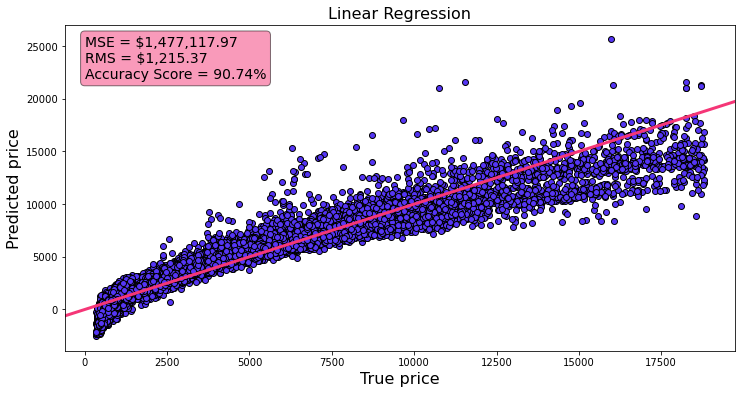

In [40]:
plot_model_accuracy(y_test, predictedLR, linR, "Linear Regression")

Fitting a basic linear regression to our data already gives a decent predictive model. Still, we can improve a lot on this accuracy so we will change to boosting models. 

## Gradient Boosting Tree Regression

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
gBoost = GradientBoostingRegressor()
gBoost.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [43]:
predictedgBoost = gBoost.predict(X_test)
predictedgBoost = predictedgBoost.reshape((predictedgBoost.shape[0], 1))

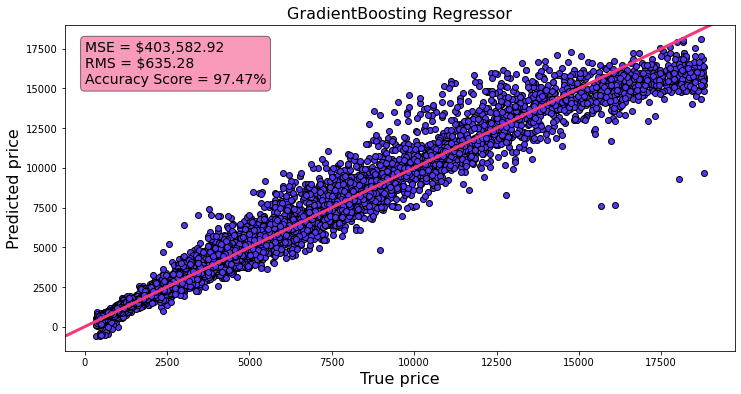

In [44]:
plot_model_accuracy(y_test, predictedgBoost, gBoost, "GradientBoosting Regressor")

We can see straight away that by using gradient boosting we can obtain a very good model, but there are better models which we will see later. 

## AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [46]:
adaBoost = AdaBoostRegressor()
adaBoost.fit(X_train, y_train.values.ravel())

AdaBoostRegressor()

In [47]:
predictedaBoost = adaBoost.predict(X_test)
predictedaBoost = predictedaBoost.reshape((predictedaBoost.shape[0], 1))

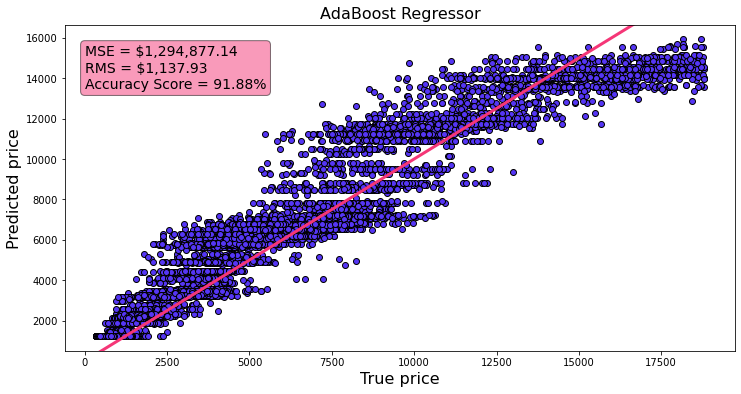

In [48]:
plot_model_accuracy(y_test, predictedaBoost, adaBoost, "AdaBoost Regressor")

This model is worse than gradient boosting and the values of the predicted price follow horizontal lines so this model will not be used. 

## xGBoost

In [49]:
import xgboost as xgb

In [50]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [51]:
xgb_model.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
predictedxgBoost = xgb_model.predict(X_test)
predictedxgBoost = predictedxgBoost.reshape((predictedxgBoost.shape[0], 1))

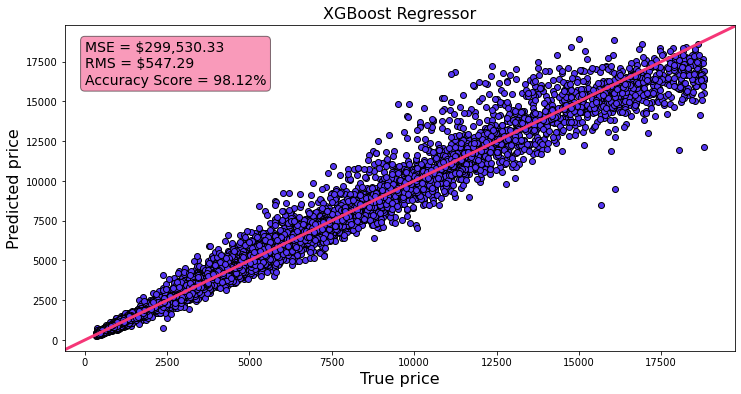

In [53]:
plot_model_accuracy(y_test, predictedxgBoost, xgb_model, "XGBoost Regressor")

Here we as with gradient boosting we obtain the best single model out of all which we will improve on by tuning the hyperparameters and stacking with other models in hopes of increasing the accuracy even more.

## SVR

In [54]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1) 
svr_rbf.fit(X_train, y_train.values.ravel())

SVR(C=100, gamma=0.1)

In [58]:
predictedSVR = svr_rbf.predict(X_test)
predictedSVR = predictedSVR.reshape((predictedSVR.shape[0], 1))

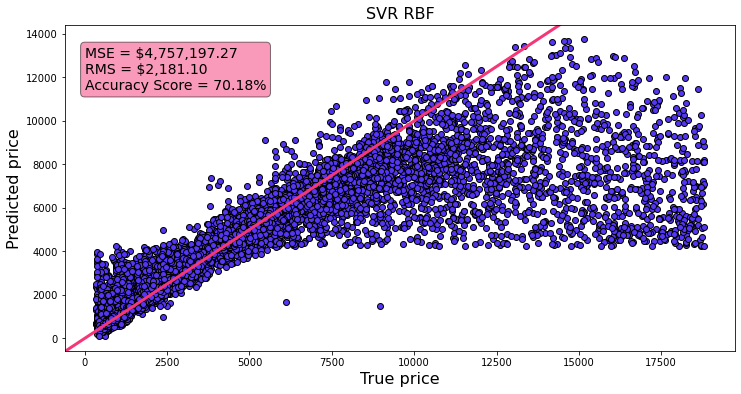

In [59]:
plot_model_accuracy(y_test, predictedSVR, svr_rbf, "SVR RBF")

We can see that the score with this model is not even close to the previous models. We can say that this was the type of model that took the longest to train. Probably if we let it train for a longer time we would obtain a better score, but considering the rest of the models fit the data faster and obtain excellent scores of accuracy there is really no point in considering optimizing this SVR

In [67]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', C=1, degree=2)

svr_rbf.fit(X_train, y_train.values.ravel())
svr_lin.fit(X_train, y_train.values.ravel())
svr_poly.fit(X_train, y_train.values.ravel())

SVR(C=1, degree=2, kernel='poly')

In [68]:
predictedRBF = svr_rbf.predict(X_test)
predictedRBF = predictedRBF.reshape((predictedRBF.shape[0], 1))

predictedSVRL = svr_lin.predict(X_test)
predictedSVRL = predictedSVRL.reshape((predictedSVRL.shape[0], 1))

predictedPOLY = svr_poly.predict(X_test)
predictedPOLY = predictedPOLY.reshape((predictedPOLY.shape[0], 1))

Code for displaying RMS and score boxes in graphs

In [629]:
models_predictions = [predictedRBF, predictedSVRL, predictedPOLY] 
mse = []
rms = []
acc = []
textstr = []

In [630]:
acc.append(svr_rbf.score(X_test, y_test)*100)
acc.append(svr_lin.score(X_test, y_test)*100)   
acc.append(svr_poly.score(X_test, y_test)*100)

In [631]:
for model_prediction in models_predictions:
    mse.append(metrics.mean_squared_error(y_test, model_prediction))
    rms.append(np.sqrt(metrics.mean_squared_error(y_test, model_prediction)))
for i in range(3):
    textstr.append('MSE = ${0:,.2f}\nRMS = ${1:,.2f}\nAccuracy Score = {2:.2f}%'.format(mse[i], rms[i], acc[i]))    
    
# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', alpha=.5, color="#F53677", ec="k")

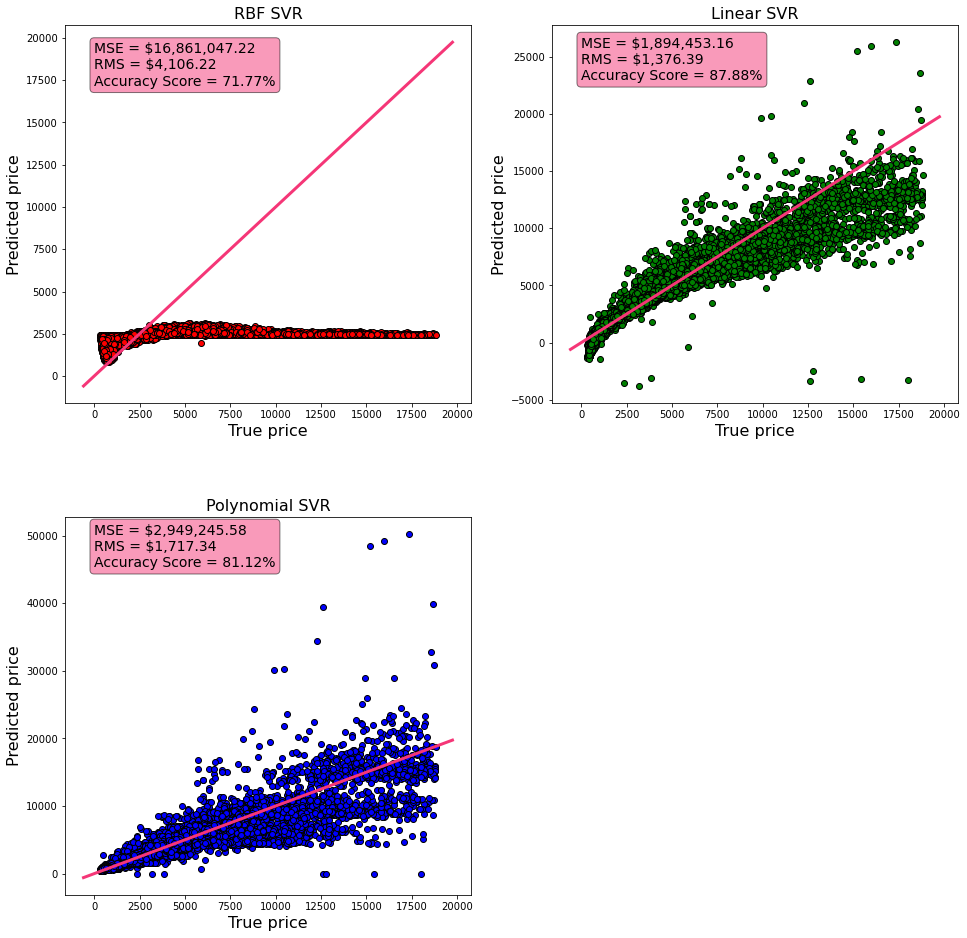

In [632]:
fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
    
ax1.scatter(y_test, predictedRBF, c='r', label='RBF', ec="k")
ax1.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)
ax1.text(0, max(ax1.get_ylim())-1e3, textstr[0], fontsize=14, verticalalignment='top', bbox=props)

ax2.scatter(y_test, predictedSVRL, c='g', label='Linear', ec="k")
ax2.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)
ax2.text(0, max(ax2.get_ylim())-1e3, textstr[1], fontsize=14, verticalalignment='top', bbox=props)

ax3.scatter(y_test, predictedPOLY, c='b', label='Polynomial', ec="k")
ax3.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)
ax3.text(0, max(ax3.get_ylim())-1e3, textstr[2], fontsize=14, verticalalignment='top', bbox=props)

fontsize = 16

ax1.set_xlabel('True price', fontsize=fontsize)
ax2.set_xlabel('True price', fontsize=fontsize)
ax3.set_xlabel('True price', fontsize=fontsize)

ax1.set_ylabel('Predicted price', fontsize=fontsize)
ax2.set_ylabel('Predicted price', fontsize=fontsize)
ax3.set_ylabel('Predicted price', fontsize=fontsize)

ax1.set_title('RBF SVR', fontsize=fontsize)
ax2.set_title('Linear SVR', fontsize=fontsize)
ax3.set_title('Polynomial SVR', fontsize=fontsize)
plt.show()


This model did not turn out that well so it will not be used anywhere in the future for our task.
Linear SVR gave us the highest accuracy but still much lower than other models already seen so none of the three SVR models will be used.

## Random Forest

### Can tune tree depth, number of trees, number of bootstrapped samples

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
randForest = RandomForestRegressor(n_estimators=10, random_state=0)
randForest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [62]:
predictedRForest = randForest.predict(X_test)
predictedRForest = predictedRForest.reshape((predictedRForest.shape[0], 1))

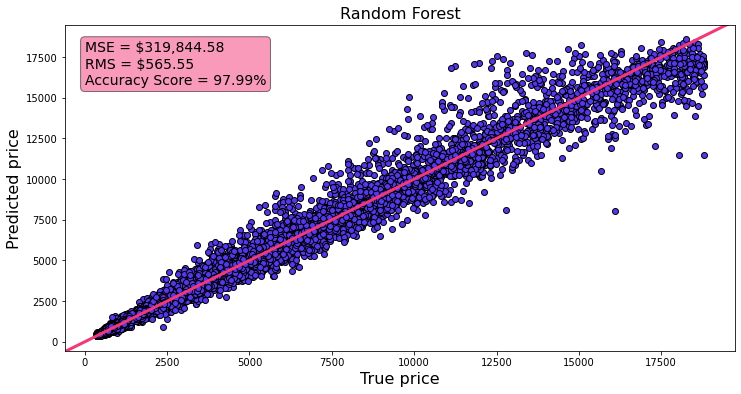

In [63]:
plot_model_accuracy(y_test, predictedRForest, randForest, "Random Forest")

This model along with XGboost provide us with the two best models by themselves with astonishing accuracy. We will improve on both of them by hypertuning the parameters to try and further increase our accuracy.


# Stacking Regressor

In [64]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor, StackingRegressor, RandomForestRegressor

In [65]:
estimators = [
    ('lasso', Lasso(random_state=42)),
    ('ridge', Ridge(random_state=42)),
    ('lr', LinearRegression()),
    ('xgboost', xgb.XGBRegressor(objective="reg:squarederror", random_state=42))
]


stackreg= StackingRegressor(
    estimators=estimators,
     final_estimator=RandomForestRegressor(n_estimators=10,
                                           random_state=42))

In [66]:
stackreg.fit(X_train, y_train.values.ravel())

StackingRegressor(estimators=[('lasso', Lasso(random_state=42)),
                              ('ridge', Ridge(random_state=42)),
                              ('lr', LinearRegression()),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                              

In [67]:
predictedstreg = stackreg.predict(X_test)
predictedstreg = predictedstreg.reshape((predictedstreg.shape[0], 1))

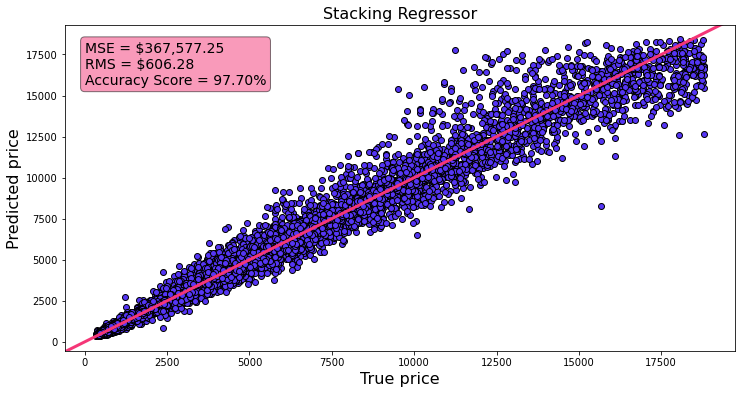

In [68]:
plot_model_accuracy(y_test, predictedstreg, stackreg, "Stacking Regressor")

We performed a stacking procedure of models using Lasso, Ridge, Linear regressions along with XGBoost and RandomForest, to experiment with the idea and see the results we could obtain. We obtain results of lower accuracy compared to those of both XGBoost and RandomForest by themselves. This is most likely due to overfitting. 

# Hyperparameter tuning

As we all know tuning hyperparameters is important when improving your model. Whether it is the maximum tree depth that we change, or the learning rate or whatever else, all of these hyperparameters affect our accuracy and error. We have to be careful in order not to overfit or underfit our model further. To do this, we could go with a randomized tuning approach (RandomizedSearchCV) or fixed grid approach (GridSearchCV), or even both. We decided to go with GridSearchCV.  We only tuned hyperparameters of our top two models (XGBoost and RandomForest) since it takes a lot of computational power and would most likely not be worth it to do for other models. 

In [69]:
from sklearn.model_selection import GridSearchCV

## RandomForest with GridSearchCV

In [70]:
randForest = RandomForestRegressor(random_state=0)
param_grid = { 
    'n_estimators': [10,50,100],
    'max_features': ['auto', 'sqrt'],
}
CV_randForest = GridSearchCV(estimator=randForest, param_grid=param_grid, cv= 5)

In [71]:
CV_randForest.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100]})

In [72]:
best_max_features = CV_randForest.best_params_["max_features"]
best_n_estimators = CV_randForest.best_params_["n_estimators"]

In [73]:
randForestCV = RandomForestRegressor(random_state=42, max_features=best_max_features, n_estimators= best_n_estimators) 

In [74]:
randForestCV.fit(X_train, y_train.values.ravel())
predictionrandForestCV = randForestCV.predict(X_test)
predictionrandForestCV = predictionrandForestCV.reshape((predictionrandForestCV.shape[0], 1))

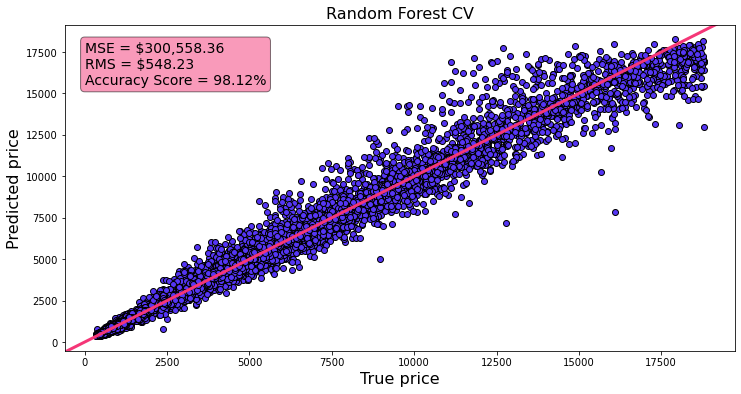

In [75]:
plot_model_accuracy(y_test, predictionrandForestCV, randForestCV, "Random Forest CV")

By using GridSearchCV we can test different hyperparameters and their effect on the accuracy and then choose the best hyperparameters from our grid of choices. Here we can see that by tuning the hyperparameters we managed to get even better accuracy! We tuned the number of trees in the forest and the number of features to consider when looking at the best split since these are the hyperparameters that we believed would be most likely to affect the accuracy the most . We could add  more values of the features and other features into our grid to try to obtain an even higher accuracy but that would increase the compilation time drastically and the accuracy would increase ever so slightly (if it would change at all). 

## xGBoost with GridSearchCV

In [485]:
xgbReg = xgb.XGBRegressor(random_state = 0)
param_grid = { 
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.05, 0.1, 0.2]
}

CV_xgbReg = GridSearchCV(estimator= xgbReg, param_grid=param_grid, cv= 5)

In [486]:
CV_xgbReg.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=0,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [487]:
best_learning_rate = CV_xgbReg.best_params_["learning_rate"]
best_n_estimators = CV_xgbReg.best_params_["n_estimators"]

In [488]:
xgbRegCV = xgb.XGBRegressor(learning_rate= learning_rate, n_estimators= best_n_estimators)

This ran way faster with the new best parameters

In [490]:
xgbRegCV.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [491]:
predictionxgbRegCV=xgbRegCV.predict(X_test)
predictionxgbRegCV = predictionxgbRegCV.reshape((predictionxgbRegCV.shape[0], 1))

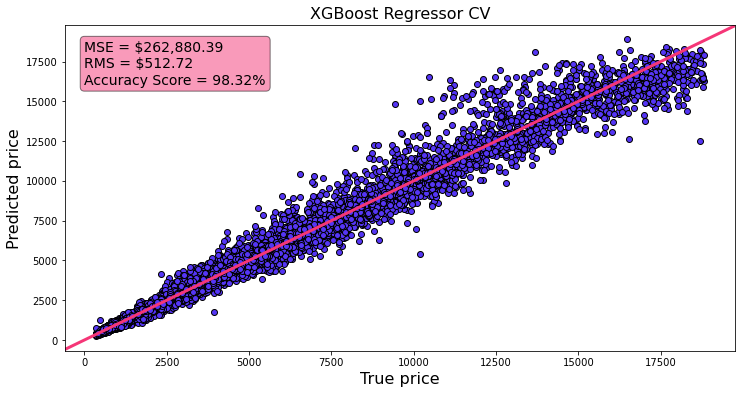

In [640]:
plot_model_accuracy(y_test, predictionxgbRegCV, xgbRegCV, "XGBoost Regressor CV")

Here we also used GridSearchCV and obtained our best overall model so this will be the one that we use to predict the price of diamonds! We decided to tune the learning rate and the number of boosting stages to perform. Since boosting is fairly robust to over-fitting this means that a larger number usually results in better performance so we put fairly high values of that hyperparameter into our grid. 

# Model evaluation

In [643]:
models_names = []
mse_values = []
rms_values = []
acc_values = []

for model, attributes_dict in models_scores.items():
    models_names.append(model)
    mse_values.append(attributes_dict["mse"])
    rms_values.append(attributes_dict["rms"])
    acc_values.append(attributes_dict["acc"])

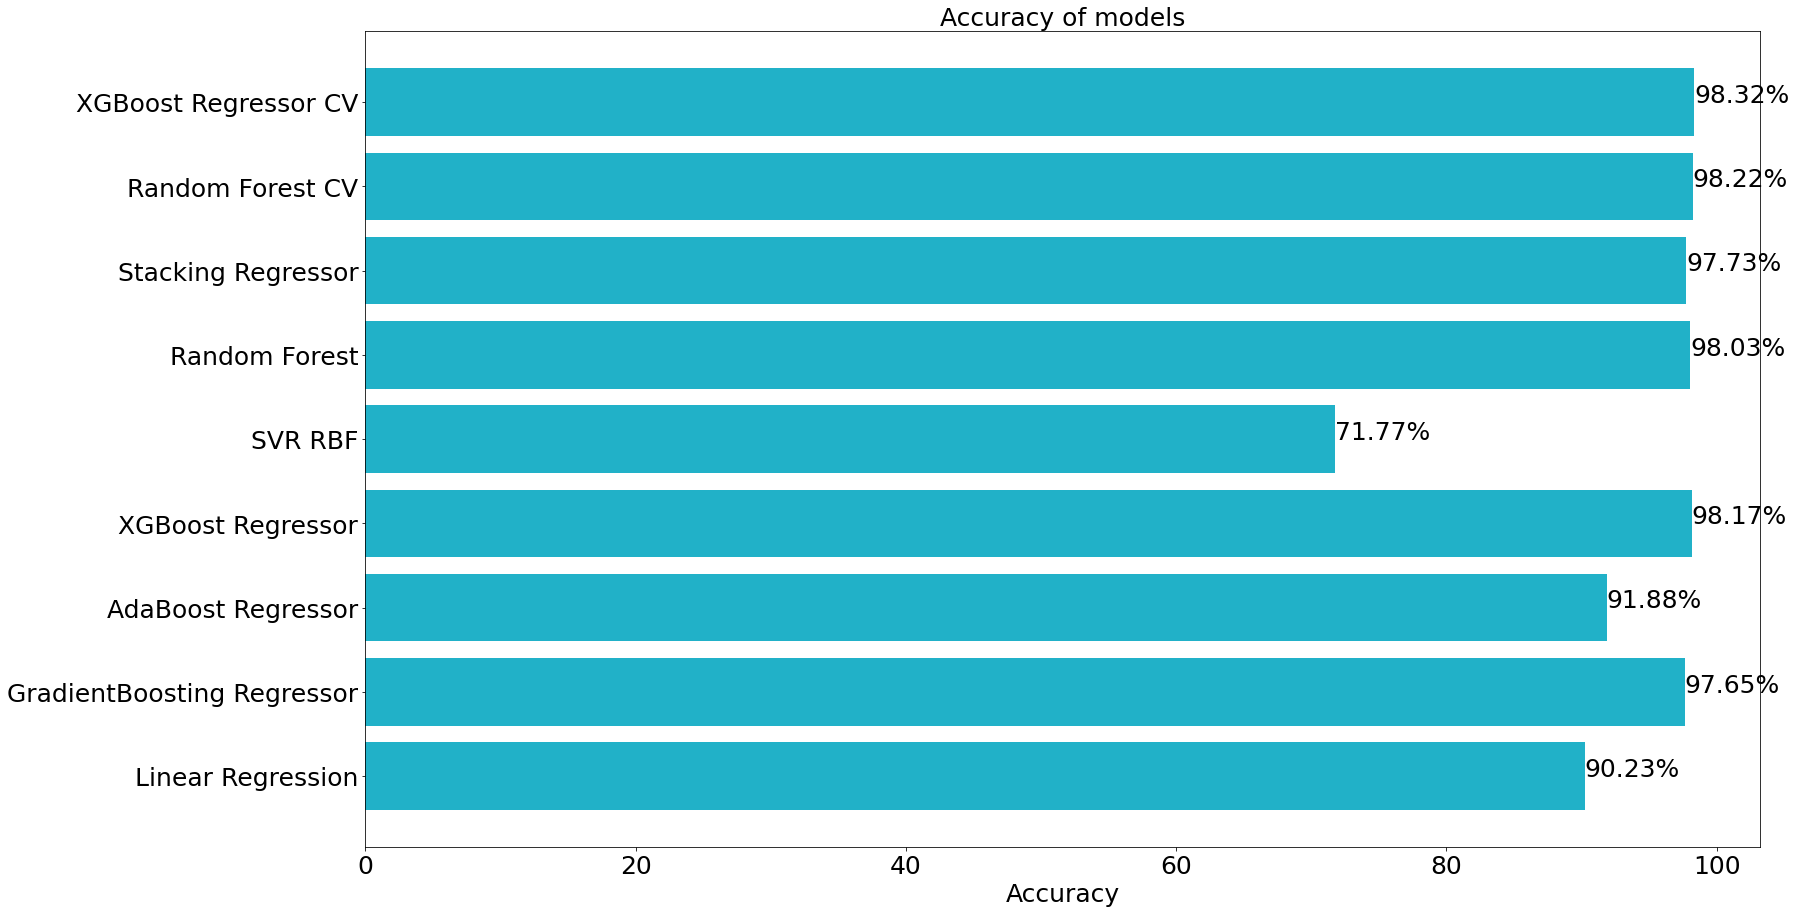

In [701]:
plt.figure(figsize=(25,15))

plt.barh(models_names, acc_values, color="#21B1C8")
for index, value in enumerate(acc_values):
    plt.text(value, index, "{0:.2f}%".format(value), fontsize=25, horizontalalignment='left')
plt.title('Accuracy of models', fontsize=25)
plt.xlabel('Accuracy', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.show()

Here we can see the first comparison between all of the models. We can see that all models except for SVR achieved pretty good results. We can see that our top two models with tuned hyperparameters (XGBoost and RandomForest) achieved absolutely amazing results. Moreover, even without tuned hyperparameters the same models achieved very good results. All in all, next time that we want to predict the value of a diamond we would use XGBoost with tuned hyperparameters. 

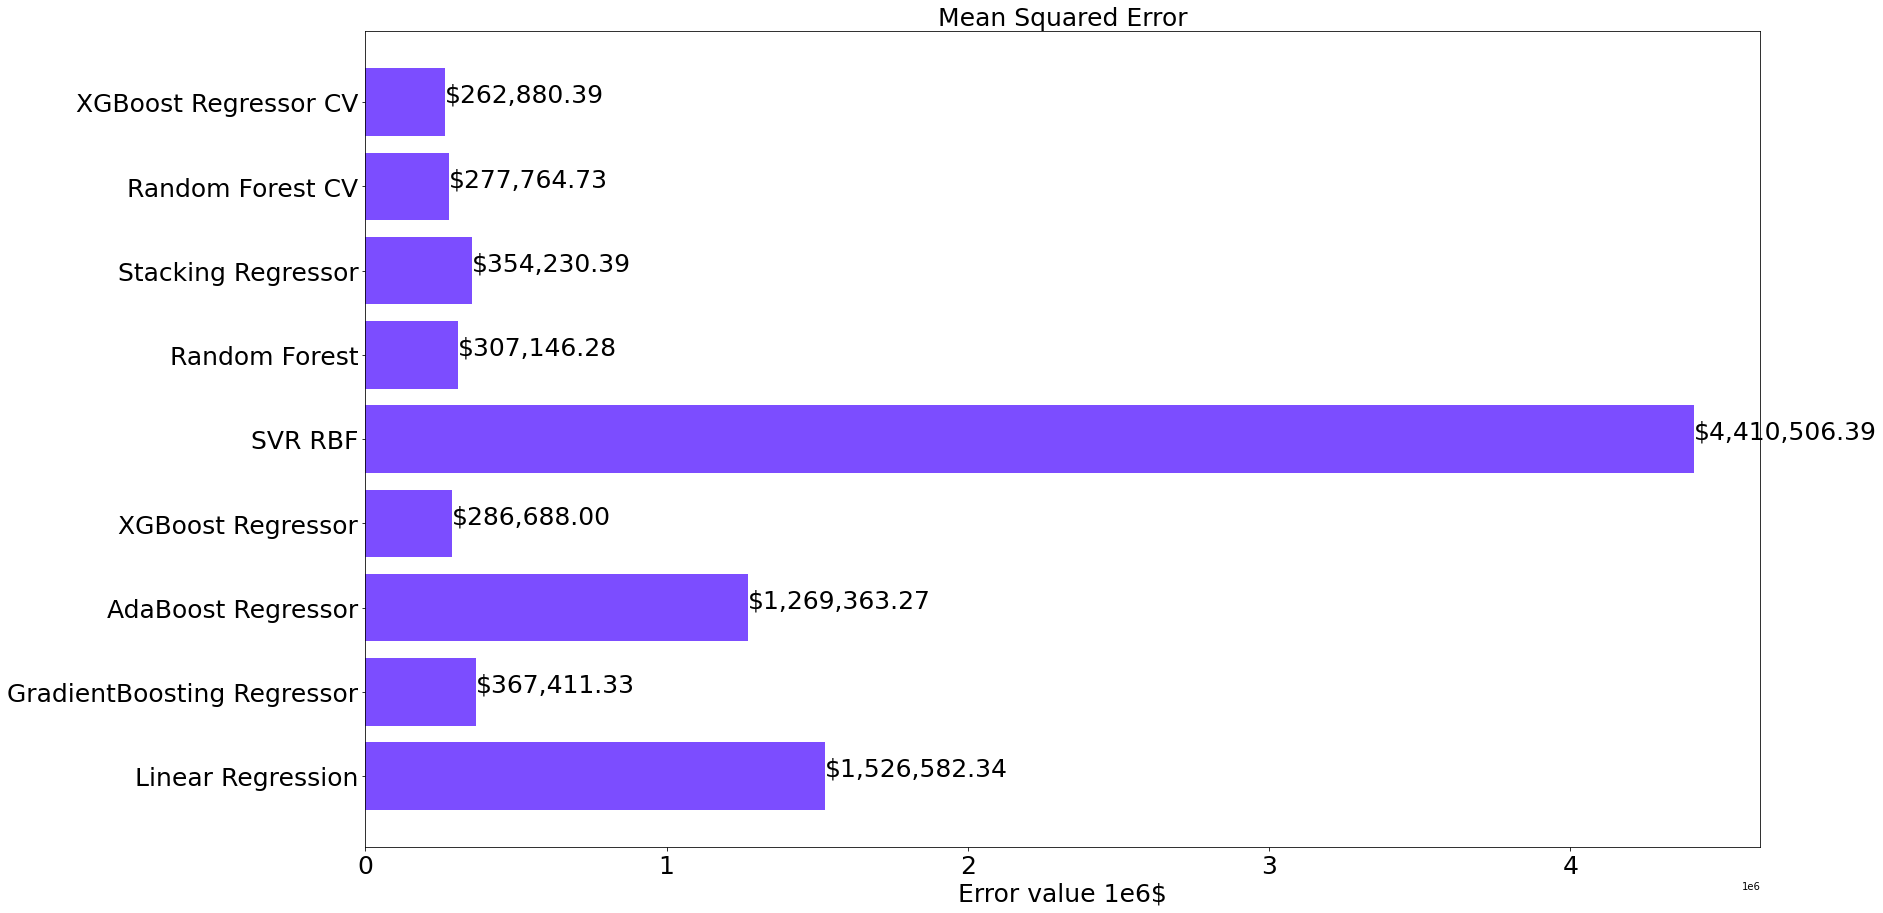

In [702]:
plt.figure(figsize=(25,15))

plt.barh(models_names, mse_values, color="#7C4DFF")
for index, value in enumerate(mse_values):
    plt.text(value, index, "${0:,.2f}".format(value), fontsize=25, horizontalalignment='left')
plt.title('Mean Squared Error', fontsize=25)
plt.xlabel('Error value 1e6$', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

The mean squared error measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.  Here we see the same thing as in the accuracy graph, all models provide good results except for SVR. SVR did so badly because we did not train the model for enough time considering what it requires. It takes much more time to train it than the other models which is already a good reason to discard it. 

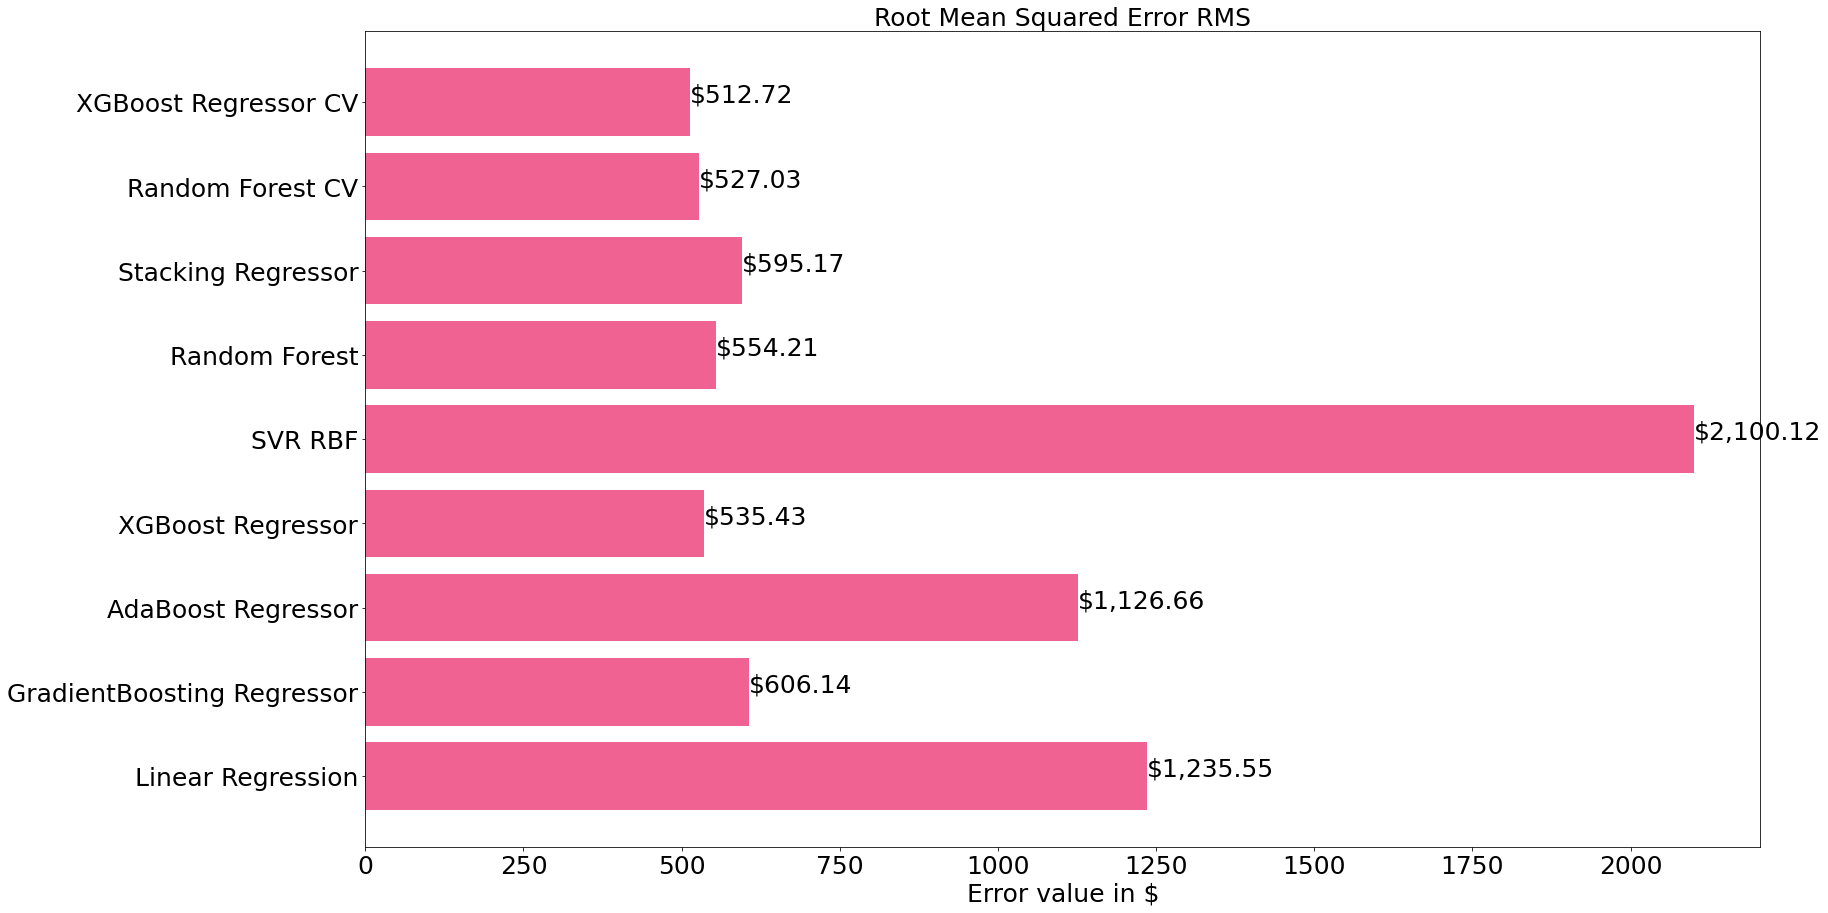

In [703]:
plt.figure(figsize=(25,15))

plt.barh(models_names, rms_values, color="#F06292")
for index, value in enumerate(rms_values):
    plt.text(value, index, "${0:,.2f}".format(value), fontsize=25, horizontalalignment='left')
plt.title('Root Mean Squared Error RMS', fontsize=25)
plt.xlabel('Error value in $', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

This graph is shows the exact same idea behind the comparison of our models, except the square root is taken of the values. As expected, XGBoost CV and RandomForestCV have the lowest root mean squared error.